# SCIKIT-LEARN
<font size=4 face = 'Calibri' >  scikit-learn  open source Python  модуль, предсталяющий широкий перечень инструментов для машинного обучения. 

****
### Table of Contents
- - -
<font size = 4 space = 10.8>
    
* [Установка и изучение SCIKIT-LEARN](#1.-Установка-и-изучение-SCIKIT-LEARN)  

    
* [Метод главных компонент](#2.-Principal-Component-Analysis-(Метод-главных-компонент)) 


* [Нелинейная регрессия](#3.-Нелинейная-регрессия)


* [Примеры работы классификаторов из SKLEARN](#4.-Примеры-работы-классификаторов-из-SKLEARN)


* [Мультирегрессия](#5.-Софт-макс-регрессия---мультирегрессия)







****
# 1. Установка и изучение SCIKIT-LEARN

##### для первоначального знакомства с  scikit-learn создана следующая шпаргалка

<font size=4 face = 'Calibri' >  https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf

 если у вас нет данного модуля, то установите его следующей командой

In [1]:
!pip install sklearn

<font size=4 face = 'Calibri' >  теперь можно импортировать библиотеку

In [15]:
import sklearn

### Загрузка датасетов


###### некоторые станадртные наборы данных содержатся в sklearn  по умолчанию

<font size=4 face = 'Calibri' >  
дял загрузки данных нужен модуль датасетов $\textbf{datasets}$. 

Для начала рассмотрим набор рукописных цифр $\textbf{load_digits()}$ :

In [ ]:
# Import `datasets` from `sklearn`
from sklearn import ________

# Load in the `digits` data
digits = datasets.load_digits()

# Print the `digits` data 
print(______)

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


#### визуализация набора данных

<font size=4 face = 'Calibri' >  набор содержит как сами данные  цифром так их изображения


<Figure size 432x288 with 0 Axes>

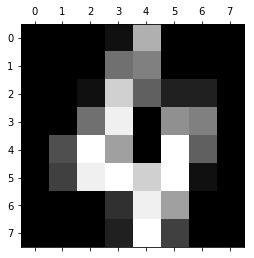

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
(1797, 8, 8)


In [6]:
import matplotlib.pyplot as plt 
plt.gray() # Set the colormap to "gray"
plt.matshow(digits.images[4])  # Display an array as a matrix in a new figure window.
plt.show() 
print(digits.images[1])
print(digits.images.shape)

###### !Note that the grayscale images are the matrix where each element corresponds to the inverse gray intensity

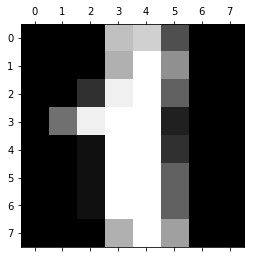

In [7]:
plt.matshow(digits.images[1])  # Display an array as a matrix in a new figure window.
plt.show() 

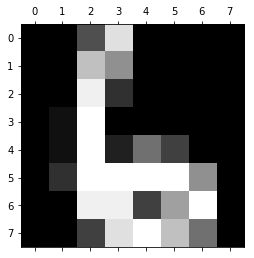

In [8]:
plt.matshow(digits.images[67])  # Display an array as a matrix in a new figure window.
plt.show() 

<font size=4 face = 'Calibri' >  также визуализация

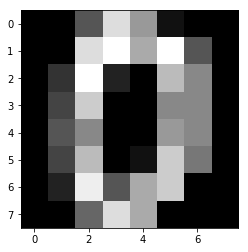

In [11]:
plt.imshow(digits.images[0])

<font size=4 face = 'Calibri' >   и также она

Text(0, 7, '0')

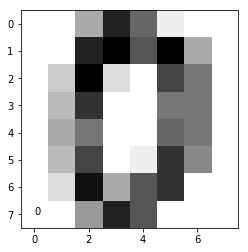

In [12]:
plt.imshow(digits.images[0], cmap=plt.cm.binary)
plt.text(0, 7, str(digits.target[0]))

<font size=4 face = 'Calibri' >   Изображения можно просмотреть вместе

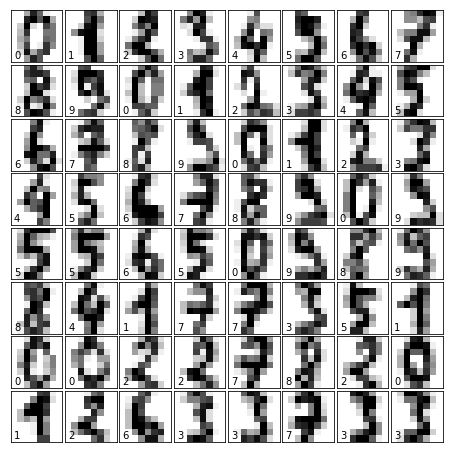

In [14]:

fig = plt.figure(figsize=(6, 6)) # create fugure 

# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 64 images
for i in range(64):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

# Show the plot
plt.show()

In [15]:
print(digits.images.shape)

(1797, 8, 8)


<font size=4 face = 'Calibri' >   видно, что в набор входит 1797 изображений, каждое 8х8 пикселей

<font size=4 face = 'Calibri' >  причем данные - это изображения представленные в виде векторов



In [16]:
'''
With the numpy method all(), 
you evaluate if it’s true that the reshaped images 
array equals digits.data. 
You’ll see that the result will be True in this case.
'''
import numpy as np
print(np.all(digits.images.reshape((1797,64)) == digits.data))

True


<font size=4 face = 'Calibri' >  Другой путь к получению данных - это скачать стандартные наборы с рессурсов, предоставлющих соответствующие услгуи.
http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/

для импорта данных нужна специальная библиотека pandas


In [ ]:
!pip install pandas

<font size=4 face = 'Calibri' > рассмотрим возможность выгрузки набора данных прямо с сайта-репозиторияь

In [17]:
import pandas as pd # pandas is the library for work with large datasets

# Load in the data with `read_csv()`
digits = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra", header=None)

# Print out `digits`
print(digits)

      0   1   2   3   4   5   6   7   8   9  ...  55  56  57  58  59  60  61  \
0      0   1   6  15  12   1   0   0   0   7 ...   0   0   0   6  14   7   1   
1      0   0  10  16   6   0   0   0   0   7 ...   0   0   0  10  16  15   3   
2      0   0   8  15  16  13   0   0   0   1 ...   0   0   0   9  14   0   0   
3      0   0   0   3  11  16   0   0   0   0 ...   0   0   0   0   1  15   2   
4      0   0   5  14   4   0   0   0   0   0 ...   0   0   0   4  12  14   7   
5      0   0  11  16  10   1   0   0   0   4 ...   3   0   0  10  16  16  16   
6      0   0   1  11  13  11   7   0   0   0 ...   0   0   0   1  13   5   0   
7      0   0   8  10   8   7   2   0   0   1 ...   0   0   0   4  13   8   0   
8      0   0  15   2  14  13   2   0   0   0 ...   0   0   0  10  12   5   0   
9      0   0   3  13  13   2   0   0   0   6 ...   0   0   0   3  15  11   6   
10     0   0   6  14  14  16  16   8   0   0 ...   0   0   0  10  12   0   0   
11     0   0   0   3  16  11   1   0   0

In [13]:
print(digits.shape)

(3823, 65)


<font size=4 face = 'Calibri' >  Иногда данные предоставляются отдельно для тренировочного и тестового датасетов (в приведенном примере расширение данных train соответствует тренеровочному набору

ниже пример загрузки тестового набора

In [18]:
digits_test = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes", header=None)

# Print out `digits`
print(digits)
print(type(digits))

      0   1   2   3   4   5   6   7   8   9  ...  55  56  57  58  59  60  61  \
0      0   1   6  15  12   1   0   0   0   7 ...   0   0   0   6  14   7   1   
1      0   0  10  16   6   0   0   0   0   7 ...   0   0   0  10  16  15   3   
2      0   0   8  15  16  13   0   0   0   1 ...   0   0   0   9  14   0   0   
3      0   0   0   3  11  16   0   0   0   0 ...   0   0   0   0   1  15   2   
4      0   0   5  14   4   0   0   0   0   0 ...   0   0   0   4  12  14   7   
5      0   0  11  16  10   1   0   0   0   4 ...   3   0   0  10  16  16  16   
6      0   0   1  11  13  11   7   0   0   0 ...   0   0   0   1  13   5   0   
7      0   0   8  10   8   7   2   0   0   1 ...   0   0   0   4  13   8   0   
8      0   0  15   2  14  13   2   0   0   0 ...   0   0   0  10  12   5   0   
9      0   0   3  13  13   2   0   0   0   6 ...   0   0   0   3  15  11   6   
10     0   0   6  14  14  16  16   8   0   0 ...   0   0   0  10  12   0   0   
11     0   0   0   3  16  11   1   0   0

In [15]:
print(digits_test.shape)
print(type(digits_test))

(1797, 65)
<class 'pandas.core.frame.DataFrame'>


<font size=4 face = 'Calibri' >  лучше хранить наборы в формате numpy

In [ ]:

import numpy as np
digits_test_np = np.array(digits_test)
digits_np = np.array(digits)

print(type(digits_np))

# Print out the data type of data, imported from sclearn
print(type(digits.data))

<font size=4 face = 'Calibri' >  встроенные наборы данных имеют ряд параметров:

In [19]:
# Load in the `digits` data
digits = datasets.load_digits()

# Get the keys of the `digits` data
print(digits.keys())

# Print out the data
print(digits.data)

# Print out the data type
print(type(digits.data))

# Print out the target values
print(digits.target)

# Print out the description of the `digits` data
print(digits.DESCR)

NameError: name 'datasets' is not defined

In [27]:
# Isolate the `digits` data
digits_data = digits.data

# Inspect the shape
print(digits_data.shape)

# Isolate the target values with `target`
digits_target = digits.target

# Inspect the shape
print(digits_target.shape)

# Print the number of unique labels
number_digits = len(np.unique(digits.target))

# Isolate the `images`
digits_images = digits.images 

# Inspect the shape
print(digits_images.shape)


(1797, 64)
(1797,)
(1797, 8, 8)


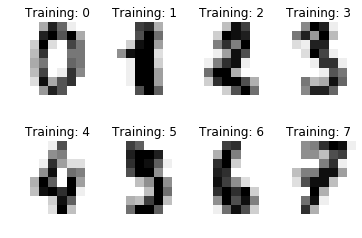

In [28]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Join the images and target labels in a list
images_and_labels = list(zip(digits.images, digits.target))

# for every element in the list
for index, (image, label) in enumerate(images_and_labels[:8]):
    # initialize a subplot of 2X4 at the i+1-th position
    plt.subplot(2, 4, index + 1)
    # Don't plot any axes
    plt.axis('off')
    # Display images in all subplots 
    plt.imshow(image, cmap=plt.cm.gray_r,interpolation='nearest')
    # Add a title to each subplot
    plt.title('Training: ' + str(label))

# Show the plot
plt.show()

### данные, находящиеся в одном наборе могут быть поделены на тренеровочную и тестовую выборки при помощи специального метода

кстати справку о методе можно получать используюя команду Tab, 

например после import чтобы посмотреть какие есть модули или, например после точки (sklearn.)

Также в скобках можно получать информацию об аргументах функции нажав shift+Tab

In [4]:
# Import `train_test_split`

from sklearn.model_selection import train_test_split

# Split the `digits` data into training and test sets
(X_train, 
X_test, 
y_train, 
y_test, 
images_train, 
images_test) = train_test_split(digits.data, 
                                digits.target,
                                digits.images, 
                                test_size    = 0.25, 
                                random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

NameError: name 'digits' is not defined

### Упражнение
<font size=4 face = 'Calibri' >  
скачать набор данных  https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv

<font size=4 face = 'Calibri' >  
разделить его на части, 70% отвести на тренеровочную выборку, которую назвать dataM

<font size=4 face = 'Calibri' >  
The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution.

(41188, 21)


****
# 2. Principal Component Analysis (Метод главных компонент)
[go to content](#Table-of-Contents)  

<font size=4 face = 'Calibri' >  
* набор данных digits, рассмотренный выше содержит 64 компоненты (точки, features), что очевидно избыточно для алгоритмов машинного обучения (например для того, чтобы классифицировать где какие цифры написаны) 

<font size=4 face = 'Calibri' >  
* для снижения размерности можно использовать метод главных компонент (Principal Component Analysis (PCA)). 

<font size=4 face = 'Calibri' >  
* метод основан на выделение линейно-независимых составляющих входной выборки (сингулярных векторов) и соответствующих им синулярных числе (их интенсивности), при этом  чем больше сингулярное число, тем выше роль компоненты в выборке (то есть такая компонента оказывает большее влияние на результат обработки выборки)

<font size=4 face = 'Calibri' >  
* сингулярные числа соотвествуют дисперсии компонет 

<font size=4 face = 'Calibri' >  
* для квадртной матрицы сингялрное разложение и разложение на собственные числа - это одно и тоже

(1797, 64)
Projecting 64-dimensional data to 2-D


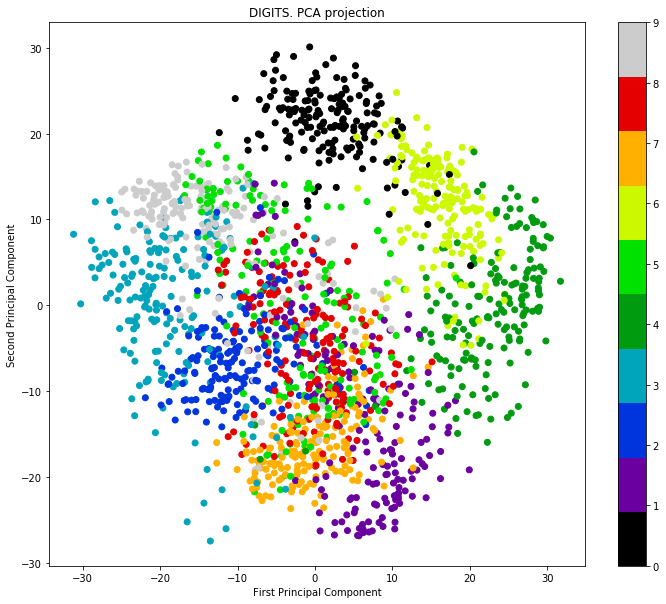

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

from sklearn import decomposition
X = digits.data
y = digits.target
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)


print('Projecting %d-dimensional data to %d-D' %(X.shape[1],X_reduced.shape[1]))


plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], 
            X_reduced[:, 1], 
            c=y, 
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('DIGITS. PCA projection')
plt.show()

###### Ниже представлено распределение дисперсии по компонентам PCA

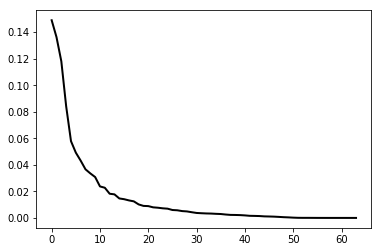

In [24]:
pca = decomposition.PCA().fit(X)
plt.plot((pca.explained_variance_ratio_), color='k', lw=2)

<font size=4 face = 'Calibri' >  
* PCA - это не единственные метод в своем классе, например для визуализации могут быть и другие алгоритмы, например TSNE

<font size=4 face = 'Calibri' >  
* t-SNE (T-distributed Stochastic Neighbor Embedding) - нелинейный алгоритм, основанный на представление классов данных распределениями и поиске близки друг другу распределений.


Text(0.5, 1.0, 'DIGITS. t-SNE projection')

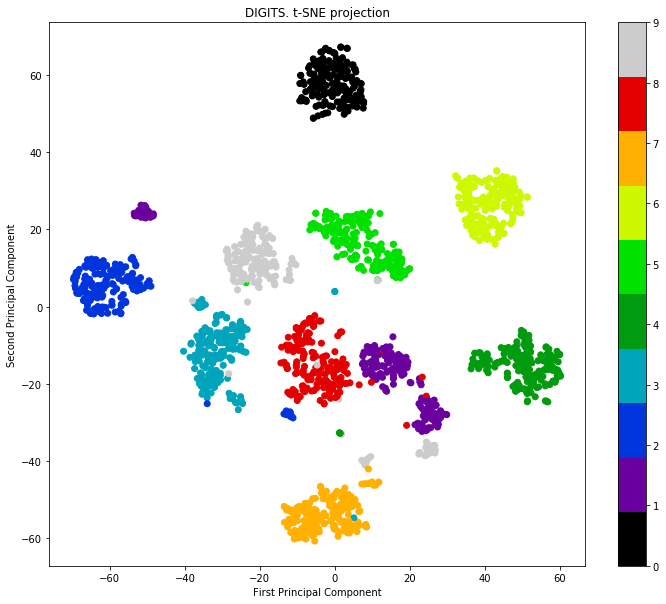

In [23]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], 
            X_tsne[:, 1], 
            c=y, 
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('DIGITS. t-SNE projection')

###### На практике двух компонент, как правило, недостаточно, обычно выбирают столько компонент, чтобы их суммарная дисперсия была как минимум 50% от дисперсии всех компонент

<font size=4 face = 'Calibri' >  
Для этого можно использовать следующий критерий
$$ \frac{\sum_{i=1}^{n_{PCA}}\sigma_i}{\sum_{i=1}^{N_{total}}\sigma_i}>threshold$$

* где
    * $ n_{PCA} $ - число компонент
    * $ N_{total}$ - полное число компонент
    * $ \sigma $ - сингулярное число ( $ \sigma^2_i $ - это дисперция $i$-того компонента)
    * $ threshold $ - порог ( как правило 50-90%)

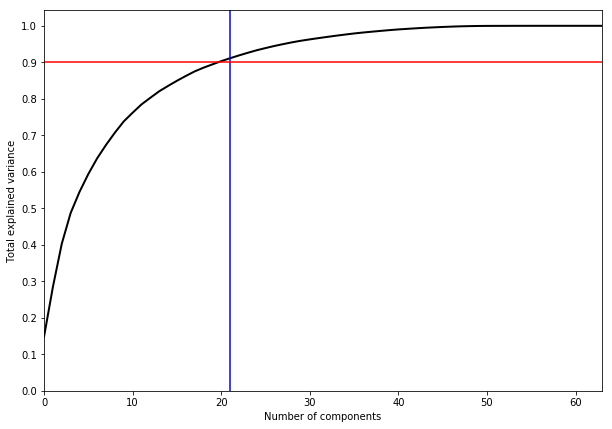

In [40]:
import numpy as np
pca = decomposition.PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show();

######  Таким образом PCA может быть рассмотрен как метод поиска оптимального базиса разложения выборки и построения проекций на этот базис.

<font size=4 face = 'Calibri' >  
результат работы PCA со сниженной размерностью можно получить по формуле:

$$ image(x)=mean+x_1⋅(basis_1)+x_2⋅(basis_2)+x_3⋅(basis_3)⋯$$

* где
    * $x_i$ - сингулярное число 
    * $basis_{i}$ iвектор PCA ( сингулярный вектор (или собственный вектор))
    * $mean$ среднее по наборду данных

In [25]:
def plot_pca_components(x, coefficients=None, mean=0, components=None,
                        imshape=(8, 8), n_components=8, fontsize=12,
                        show_mean=True):
    ''' the function for plot the number of pca components 
        https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Digits-Pixel-Components
    '''
    # initialization 
    if coefficients is None:
        coefficients = x
    
    if components is None:
        components = np.eye(len(coefficients), len(x))
        
    mean = np.zeros_like(x) + mean #for guarantee the shape of mean  
        
    # create figure with subplots
    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 4 + bool(show_mean) + n_components, hspace=0.3)
    
    # sub function for create subplots
    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), cmap=plt.cm.gray_r, interpolation='nearest')
        if title:
            ax.set_title(title, fontsize=fontsize)
            
    # show true image
    show(slice(2), slice(2), x, "True")
    
    # initilize mean image as mu
    approx = mean.copy()
    
    # for show mean value
    counter = 2
    if show_mean:
        show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
        show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1

    for i in range(n_components):
        
        # here we reconstruct the data
        approx = approx + coefficients[i] * components[i]
        
        # here we can see the component image
        show(0, i + counter, components[i], r'$c_{0}$'.format(i + 1))
        
        # here we can see the reconstructed image on the each step
        show(1, i + counter, approx,r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        
        # for show mean value
        if show_mean or i > 0:
            plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
                           transform=plt.gca().transAxes, fontsize=fontsize)
    
    # show the resulted image (reconstructed one)
    show(slice(2), slice(-2, None), approx, "Approx")
    return fig

###### Ниже можно посмотреть на процесс восстоновления 

* первое изображение - исходное
* затем идет среднее по изображению
* затем вверху идут сами компоненты
* внизу идут суммы среднего и компонет
* последнее - результат работы PCA

(1797, 34)
(34, 64)


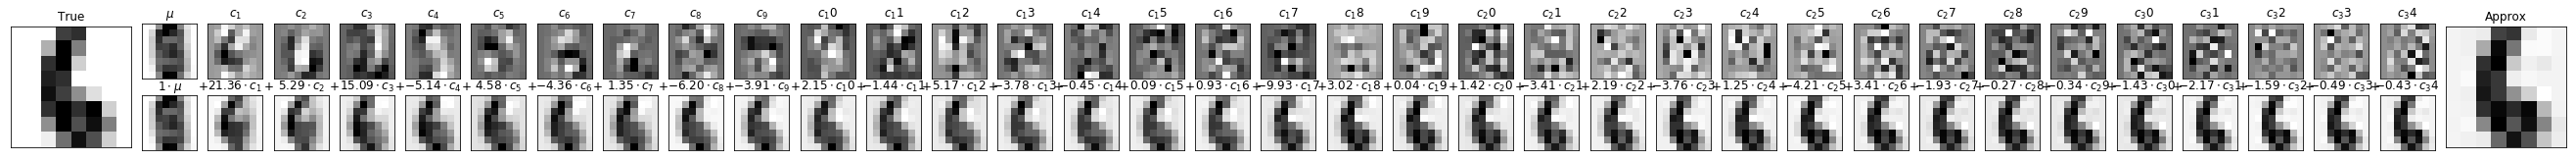

In [26]:

n_of_components = 34
Number = 6

pca   = decomposition.PCA(n_components=n_of_components)
data1 = digits.data
X_reduced = pca.fit_transform(data1)

print(X_reduced.shape)
print(pca.components_.shape)


fig = plot_pca_components(x            = digits.data[Number], 
                          coefficients = X_reduced[Number],
                          mean         = pca.mean_, 
                          components   = pca.components_,
                          n_components = n_of_components)

###### ниже приведена стандартная процедура восстоновления:

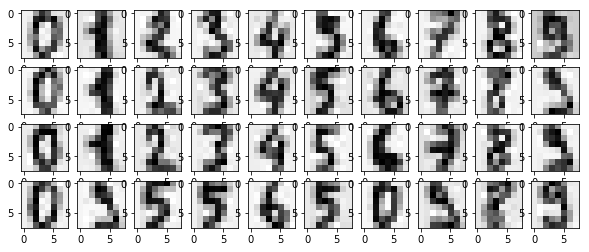

In [52]:

filtered = pca.inverse_transform(X_reduced)

fig, axes = plt.subplots(4, 10, figsize=(10, 4))

for i, ax in enumerate(axes.flat):
    ax.imshow(filtered[i].reshape(8, 8), cmap='binary', interpolation='nearest')     

###### другой метод разложения на PCA это напрямую задать часть дисперсии, которую надо сохранить , например. 50% 

21


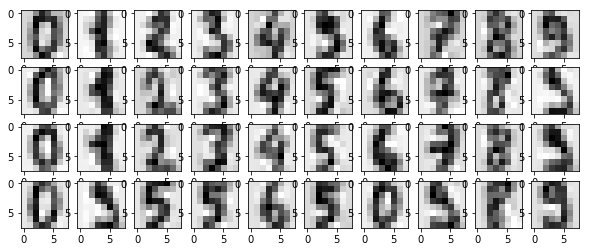

In [53]:
pca = decomposition.PCA(0.90).fit(digits.data) #require the number of components which provide 50% of the full variance
print(pca.n_components_)

X_reduced = pca.fit_transform(digits.data)

filtered = pca.inverse_transform(X_reduced)

fig, axes = plt.subplots(4, 10, figsize=(10, 4))

for i, ax in enumerate(axes.flat):
    ax.imshow(filtered[i].reshape(8, 8), cmap='binary', interpolation='nearest')    

### Упражнение 1

<font size=4 face = 'Calibri' >  
Добавить шумы к входной последовательности и посмотреть, как это скажется на результате
шумы можно добавить как: 
```python
noise = np.random.normal()
```

### Упражнение 2 

<font size=4 face = 'Calibri' >  
Провести PCA анализ для датасета из примера ниже

вместо простого PCA попробовать разные варианты разложений, например:

```python
 decomposition.RandomizedPCA
    ```

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\RonkinMV\scikit_learn_data
dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 4096)


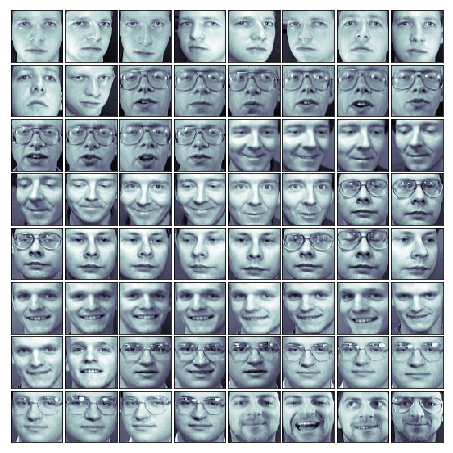

In [54]:
from sklearn.datasets import fetch_olivetti_faces
oliv=fetch_olivetti_faces()
print (oliv.keys())

print (oliv.data.shape) #tells us there are 400 images that are 64 x 64 (4096) pixels each
['images', 'data', 'target', 'DESCR']
(400, 4096)

#Setup a figure 6 inches by 6 inches
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces, each image is 64 by 64 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(oliv.images[i], cmap=plt.cm.bone, interpolation='nearest')

plt.show()

        

## В дополнение простой пример, поясняющий работу PCA для двумерного набора данных

рассмотрим набор данных

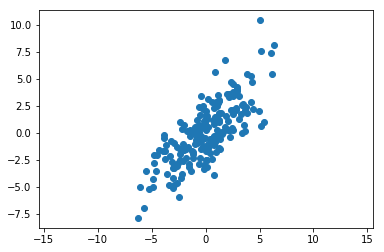

In [27]:
rng = np.random.RandomState(seed = 100) # set psudo random generator
X = np.dot(rng.rand(2, 20), rng.randn(20, 200)).T # set normal distribution
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

видно. что данные можно аппроксимировать линией или 2 линиями (вдоль X и вдоль Y), но еще лучше чтобы эти линии были не параллельны X,Y, а под таким углом, к ним, чтобы максимально точно аппроксимировать набор данных, такие линии будут называться главные компоненты, их можно получить при помощи метода PCA

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit(X)

print(pca.components_) #print PCA component (principal component )
print(pca.explained_variance_) #print  explained variance

[[ 0.6620548   0.74945543]
 [ 0.74945543 -0.6620548 ]]
[13.05231112  1.67269977]


вектора PCA будут выглядеть вот так

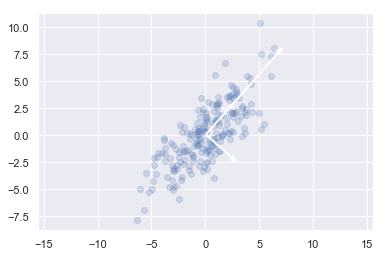

In [68]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2,)

for length, vector in zip(pca.explained_variance_, pca.components_):    
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
    
plt.axis('equal');

длина векторов - это значение их сингулярных чисел (корень из дисперсии набора данных в направлении вектора), а направление - это направления векторов PCA (они должны быть перпендикулярны)

In [69]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


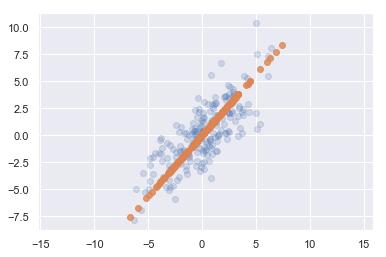

In [70]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

****
# 3. Нелинейная регрессия
[go to content](#Table-of-Contents)  

<font size=6 face = 'Calibri'  space = 2>  Для изученя нелинейной регресси предлагается классический набор данных - параметры цветов ириса для 3 его подвидов.

In [15]:
import sklearn
from sklearn import datasets
iris = sklearn.datasets.load_iris()

print (iris.target_names)
print (iris.target.shape)
print (iris.data.shape)
print (iris.feature_names)

['setosa' 'versicolor' 'virginica']
(150,)
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


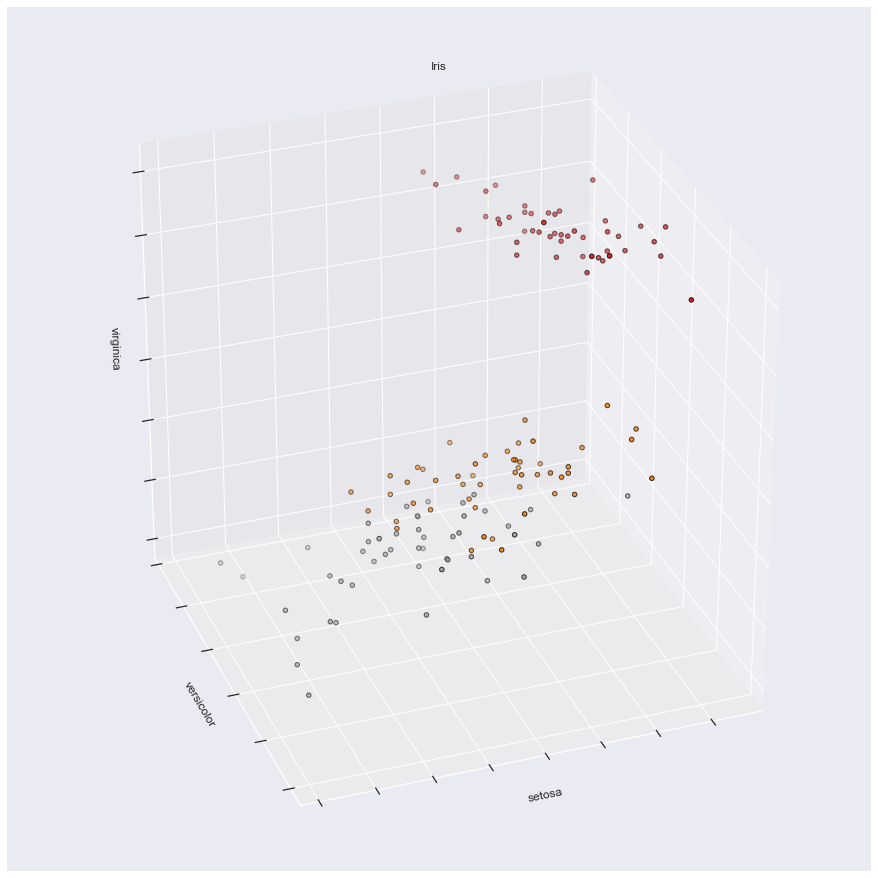

In [16]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,12))

ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(iris.data[:, 0], iris.data[:, 1], iris.data[:, 2], c=iris.target, cmap=plt.cm.Set1, edgecolor='k')
ax.set_title("Iris")
ax.set_xlabel("setosa")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("versicolor")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("virginica")
ax.w_zaxis.set_ticklabels([])

plt.show()

**Для начала выделим два класса из набора**

In [17]:
X = iris.data[:, :2]
y = (iris.target != 0) 


######  на изображении ниже показаны эти два класса серым и красным цветом


(1.5, 4.9)

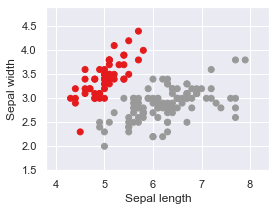

In [18]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(4, 3))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)


<font size=4 face = 'Calibri' >  Задача классификации предполагает применение функции активации к результату свертки входных данных с набором весов (то есть результат - нелинейная классифицируются функция от линейной регрессии) 
    
    
<font size=4 face = 'Calibri' >  Функция принимает значение 1 для одного из классов и значение 0 для другого
функция называется сигмоид.


$$ h = \sigma (z) = \frac{1}{1+\exp[-z]}$$
<font size=4 face = 'Calibri' >  
* где
    * $z = \theta^T * x$
    * $\theta$ - вектор весов
    * x  - входные данные

In [19]:
import numpy as np

def sigmoid(h):
    return 1 / (1 + np.exp(-h))


Text(0, 0.5, 'h')

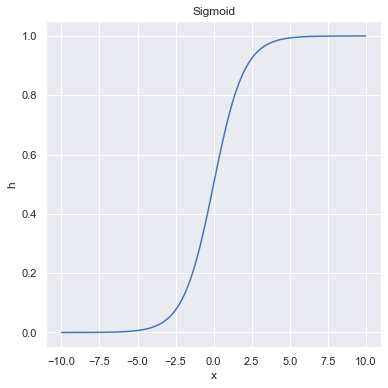

In [20]:
plt.figure(figsize=(6,6))
x = np.linspace(-10,10,100)
plt.plot(x,sigmoid(x))
plt.title('Sigmoid')
plt.xlabel('x')
plt.ylabel('h')

**Таким образом сигмоидальная функция будет отображать вероятность того, что точка (X) пренадлежит одному из двух классов (условно 0 или 1)**

<font size=4 face = 'Calibri' >  Для обучения регерссионной модели в качестве функции ошибки будем исползовать logg-loss функцию  ( cross-entropy - взаимную энтропию) 

$$ L = \frac{1}{m}[\sum_i^N{-y \log{h}-(1-h)\log{1-h}}]$$

* where
    * N is the number of measurements
    * $ h = \sigma(\theta^TX) $

In [21]:
def loss(h, y):
    return -(y*np.log(h)+(1 - y)*np.log(1 - h)).mean()

<font size=4 face = 'Calibri' >  Оптимизацию весов будем весте методом градиентного спуска

$$ \theta^t = \theta^{t-1}-\eta\nabla_{\theta}L(h,y)=\theta^{t-1} - \eta\frac{1}{m}X^T(\sigma((\theta^{t-1})^TX)-y)  $$
* where
    * $\eta$ - is the step of the gradient descent
    * t - is the number of steps

In [22]:
def gradient_step(X,y,h,step):
    gradient = np.dot(X.T, (h - y)) / y.size
    return   step * gradient

<font size=4 face = 'Calibri' >  Таким образом процедура будет иметь вид

In [23]:
# initial values
num_iter = 5e4  # number of itterations
step     = 2e-3 # value of  step

count    = 0 # for further visualization

# weights initialization
theta = 0.02*np.random.random(X.shape[1])

lv = list()

for i in range(int(num_iter)):    
    z = np.dot(X, theta)
    h = sigmoid(z)    
    loss_val = loss(h, y )
    theta = theta - gradient_step(X,y,h,step)
    
    if(i % (num_iter/20) == 0):
        lv.append(loss_val)        
        print(f'{count} itteration № {count*(num_iter/20)} loss: {loss_val} \t')
        count+=1
print(theta)

0 itteration № 0.0 loss: 0.6768237147456612 	
1 itteration № 2500.0 loss: 0.42003304569110483 	
2 itteration № 5000.0 loss: 0.3183387324433681 	
3 itteration № 7500.0 loss: 0.25889536200494895 	
4 itteration № 10000.0 loss: 0.22042027735985945 	
5 itteration № 12500.0 loss: 0.1935665825368064 	
6 itteration № 15000.0 loss: 0.17375951811608148 	
7 itteration № 17500.0 loss: 0.15853193818672706 	
8 itteration № 20000.0 loss: 0.14644501412666527 	
9 itteration № 22500.0 loss: 0.13660555297110974 	
10 itteration № 25000.0 loss: 0.12843045334525388 	
11 itteration № 27500.0 loss: 0.12152304640440414 	
12 itteration № 30000.0 loss: 0.11560410129294574 	
13 itteration № 32500.0 loss: 0.11047131542625183 	
14 itteration № 35000.0 loss: 0.10597448002360375 	
15 itteration № 37500.0 loss: 0.10199968276879787 	
16 itteration № 40000.0 loss: 0.09845893353617347 	
17 itteration № 42500.0 loss: 0.09528315961193452 	
18 itteration № 45000.0 loss: 0.09241735919632994 	
19 itteration № 47500.0 loss: 0.

<font size=4 face = 'Calibri' >  НА изображении ниже показана зависимость ошибки от номера итерации обучения

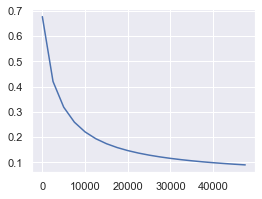

In [24]:
plt.figure(1, figsize=(4, 3))
plt.plot((num_iter/20)*np.arange(count),lv)
plt.show()


###### ПОсмотрим полученное распределние вероятности

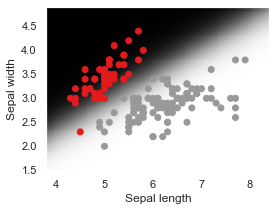

In [25]:
plt.figure(1, figsize=(4, 3))

# Plot the decision boundary. For that, we will assign a color to each

# point in the mesh [x_min, x_max]x[y_min, y_max].
x1_min, x1_max = X[:,0].min()-.5, X[:,0].max()+.5,
x2_min, x2_max = X[:,1].min()-.5, X[:,1].max()+.5,

h = .02  # step size in the mesh
# create mesh for analysis
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

# create grig of prediction
grid = np.c_[xx1.ravel(), xx2.ravel()]

# make predictions for our grid
predictions = sigmoid(np.dot(grid, theta))

# Put the result into a color plot
predictions = predictions.reshape(xx1.shape)

plt.pcolormesh(xx1, xx2, predictions, cmap=plt.cm.gray)


# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()




<font size=4 face = 'Calibri' >  На самом деле все распределение не нужно, а нужно только некоторое пороговое значение вероятности принадлежности к одному из двух классов

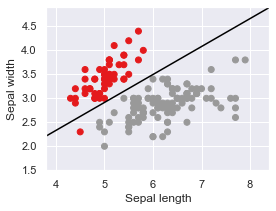

In [26]:
plt.figure(1, figsize=(4, 3))
threshold = 0.5 # 50%


# Plot the decision boundary. For that, we will assign a color to each

# point in the mesh [x_min, x_max]x[y_min, y_max].
x1_min, x1_max = X[:,0].min()-.5, X[:,0].max()+.5,
x2_min, x2_max = X[:,1].min()-.5, X[:,1].max()+.5,

h = .02  # step size in the mesh
# create mesh for analysis
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

# create grig of prediction
grid = np.c_[xx1.ravel(), xx2.ravel()]

# make predictions for our grid
predictions = sigmoid(np.dot(grid, theta))

# Put the result into a color plot
predictions = predictions.reshape(xx1.shape)

plt.contour(xx1, xx2, predictions, [threshold],  colors='black')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()



<font size=4 face = 'Calibri' >  Теперь можно построить функцию, которая по параметрам sepal_length и sepal_width будет предсказывать класс ириса

In [27]:
def predict(sepal_length,sepal_width):
    ''' function for prediction calss of irris by it sepal parameters '''
    threshold   = 0.5
    x_new       = np.array([sepal_length,sepal_width])
    predictions = sigmoid(np.dot(x_new, theta))
    if predictions>threshold:
        print("red class")
    else:
        print("gray class")
    return predictions

**посмотрим как она работает**

In [28]:
sepal_length = 4.2
sepal_width  = 3.12
p = predict(sepal_length,sepal_width )

sepal_length = 7.4
sepal_width  = 3.0
p = predict(sepal_length,sepal_width )

gray class
red class


- - -
### Упражнение 1 

<font size=4 face = 'Calibri' >  
**1**. помеяйте набор данных на следующий

```python
X = iris.data[:, [3,1]]
y = (iris.target != 2) .
```

**2**. напишите функции метрик  результатов работы классификатора (см. выражения для метрик ниже).

**3**. постройте графики зависимости для метрик от числа итераций

**4**. помеяйте набор данных на следуюищй и повтороите эксперимент с метриками
```python
X = iris.data[:, [1,2]]
y = (iris.target != 2) 
```


**метрики можно вычислить как**

$$   \begin{equation}         
            metricMatrix  = 
                \begin{bmatrix}
                     TP&FP\\
                    FN&TN
                  \end{bmatrix}
            \end{equation}  $$
* where 
    * TP - true positive
    * TN - true negative
    * FP - false positive
    * FN - false negative    
    * **metricMatrix - матрица метрик**

$$ recall = \frac{TP}{TP+FN}$$

$$ precision = \frac{TP}{TP+FP}$$

$$ accuracy = \frac{TP+FN}{TP+FP+TN+FP}$$

$$ specifity = \frac{TN}{FP+TN}$$

$$ F1     = \frac{2*precision*recall}{precision+recall}$$




### Упражнение 2
<font size=4 face = 'Calibri' >  
**1** Разделите выборку на валидационную и тренировочную и постройте результат обучения по обеим выборкам

**2** Напишите функцию для т.н. ранней остановки обучения (когда ошибка по валидационной выборке дошла до минимума)




### Упражнеие 3 
<font size=4 face = 'Calibri' color = 'Red' >  [НЕОБЯЗАТЕЛЬНО!]

<font size=4 face = 'Calibri'  color = 'Black' >  
Добавьте в функцию обучения реализацию стохастического градиентного спуска по мини-пакетам (минибатчам) с регулируемым размером

    При этом методе:
    1. Входная выборка разбивается на подвыборки меньшей размерности
        1.1. подвыборки выбираются случайно
        1.2. данные в подвыборках не должны повторятся 
    2. Каждая итерация разбивается на подитерации (число подитераций = числу подвыборок (входной параметр)
    3. Функцию ошибки и веса оптимизируются  для каждого мини-батча 
    4. Для оценки результатов обучения (и для ранней остановки) надо брать среднее значение по функциям ошибки для всех     подитераций



- - -
#  4. Примеры работы классификаторов из SKLEARN
[go to content](#Table-of-Contents)  

### Встроенная логистическая регрессия 
 C -определеяет мягкость границ

C:\Users\Ronkin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


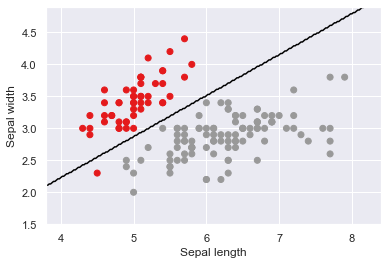

In [48]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import numpy as np
iris = datasets.load_iris()

X = iris.data[:, :2]
y = (iris.target != 0) 

# C -определеяет мягкость границ
logreg = LogisticRegression(C=5.0, random_state=0 )
logreg.fit(X, y)

predictions =  logreg.predict(np.c_[xx1.ravel(), xx2.ravel()])


predictions = predictions.reshape(xx1.shape)

plt.contour(xx1, xx2, predictions, [0.5],  colors='black')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()


#### упрожнение
поменяйте С - сделайте вывод, что поменялось 

### Метод опорных векторов с гамма ядром
параметры: мягкость границ - с, вид ядря и его параметр

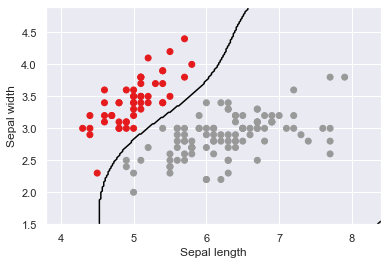

In [65]:
from sklearn import datasets
from sklearn.svm import SVC
import numpy as np
iris = datasets.load_iris()

X = iris.data[:, :2]
y = (iris.target != 0) 


svm = SVC(C=150.0, kernel='rbf', gamma= 0.53, random_state=0, )
svm.fit(X, y)
predictions =  svm.predict(np.c_[xx1.ravel(), xx2.ravel()])

predictions = predictions.reshape(xx1.shape)

plt.contour(xx1, xx2, predictions, [0.5],  colors='black')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)



plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()


C:\Users\Ronkin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


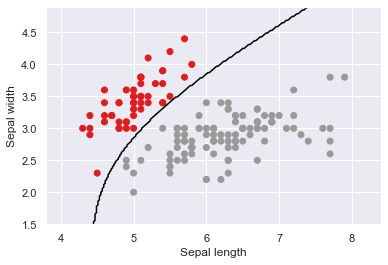

In [63]:
from sklearn import datasets
from sklearn.svm import SVC
import numpy as np


svm = SVC(C=0.05, kernel='poly', degree=6.25, random_state=0, )
svm.fit(X, y)
predictions =  svm.predict(np.c_[xx1.ravel(), xx2.ravel()])

predictions = predictions.reshape(xx1.shape)

plt.contour(xx1, xx2, predictions, [0.5],  colors='black')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)



plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

поменяйте гамма и С, посмотрите, что поменялось, сделайте вывод/

# Метод наивного Байеса

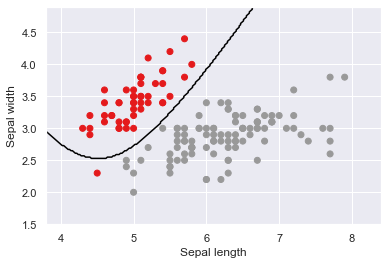

In [42]:
from sklearn import datasets
from sklearn.naive_bayes    import GaussianNB
import numpy as np
iris = datasets.load_iris()

X = iris.data[:, :2]
y = (iris.target != 0) 


nvb = GaussianNB( )
nvb.fit(X, y)
predictions =  nvb.predict(np.c_[xx1.ravel(), xx2.ravel()])

predictions = predictions.reshape(xx1.shape)

plt.contour(xx1, xx2, predictions, [0.5],  colors='black')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)



plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

# Метод k соседей

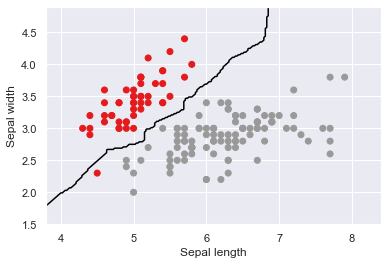

In [52]:
from sklearn import datasets
from sklearn.neighbors      import KNeighborsClassifier
import numpy as np
iris = datasets.load_iris()

X = iris.data[:, :2]
y = (iris.target != 0) 


knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X, y)
predictions =  knn.predict(np.c_[xx1.ravel(), xx2.ravel()])

predictions = predictions.reshape(xx1.shape)

plt.contour(xx1, xx2, predictions, [0.5],  colors='black')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)



plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

#### упражнение
поменяйте число соседей, посмотрите, что меняется, сделайте вывод

# Ансамбли деревьев (на примере случайного леса)

регулируется число деревьев и их параметры

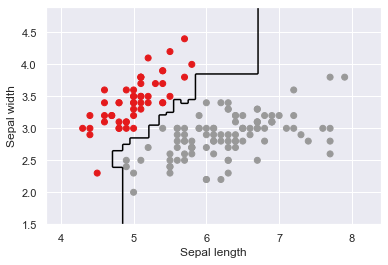

In [67]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
import numpy as np
iris = datasets.load_iris()

X = iris.data[:, :2]
y = (iris.target != 0) 


knn = RandomForestClassifier(n_estimators = 10, random_state = 42 ) 
knn.fit(X, y)
predictions =  knn.predict(np.c_[xx1.ravel(), xx2.ravel()])

predictions = predictions.reshape(xx1.shape)

plt.contour(xx1, xx2, predictions, [0.5],  colors='black')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)



plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()



#### упражнение
поменяйте параметры, посмотрите, что меняется, сделайте вывод

## Упражнение по всем классификаторам
сравните классификаторы, сделайте вывод, какой классификатор луче в каких задачах

- - - 
## Ниже приведен более красочный вариант визуализации классификатора

C:\Users\RonkinMV\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


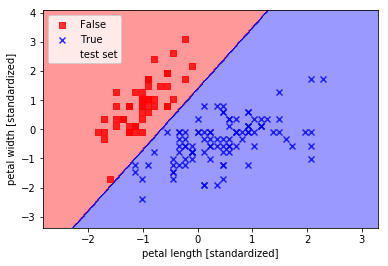

In [72]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) 

from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)

X_test_std = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

# Decision region drawing
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std,
                      y_combined, classifier=lr,
                      test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

****

# 5. Софт-макс регрессия - мультирегрессия
[go to content](#Table-of-Contents)  


<font size=4 face = 'Calibri' >  

**Softmax Regression** или  **Multi-class Logistic Regression** - это обобщение нелинейной регрессии на случай классификации нескольких (более 2) классов.

регрессия основана на т.н. софт-макс функции (аналог сигмоида для нескольких классов)
$$softmax(\theta^TX_i+b)=P(y=j \mid X_i,\theta)= \frac{\exp{[ \theta^TX_i+b]}}{\sum_{i=0}^{N} \exp{[ \theta^TX_i+b]}},$$

* где 
    * $\theta$ - вектор весов
    * $b$      - смещние
    * $X_i$    - входные данные 
    * $y=j$    - вектор классов (ответов)
    * $P(y=j \mid X_i,\theta)$ вероятность того, что  объект i пренадлежит классу j



<font size=4 face = 'Calibri' >  тперь можно попробовать разбить датасет ирисов на 3 класса

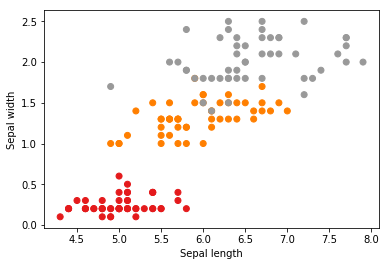

(150, 2)
(150,)


In [59]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()

X = iris.data[:,[0,3] ]
y = (iris.target) 

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()


# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

print(X.shape)
print(y.shape)

<font size=4 face = 'Calibri' >проинициализируем веста и смещения

In [60]:
n_classes = np.max(y) + 1
n_features = X.shape[1]

weights_shape=(n_features, n_classes)
bias_shape   =(n_classes,)

weights = np.random.normal(loc=0.0, scale=0.01, size=weights_shape)
bias    = np.zeros(shape=bias_shape)


print('\n number of classes:\n',  n_classes)
print('\n number of features:\n', n_features)

print('Inputs (X) shape :\n',    X.shape)
print('\n Weights  shape :\n', weights.shape)
print('\n bias shape :\n ',     bias.shape)



 number of classes:
 3

 number of features:
 2
Inputs (X) shape :
 (150, 2)

 Weights  shape :
 (2, 3)

 bias shape :
  (3,)


<font size=4 face = 'Calibri' >построим функции для расчета софт-макса

In [62]:
def linear_conv(X, weights, bias):
    return (X.dot(weights) + bias)

linConv = linear_conv(X, weights, bias)
print('number of linear convolutions:\n', linConv.shape)

number of linear convolutions:
 (150, 3)


In [63]:
def softmax(z):
    return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T

softmax_matrix = softmax(linConv)
print('softmax matrix size:\n', softmax_matrix.shape)

softmax matrix size:
 (150, 3)


<font size=5 face = 'Calibri' >теперь можно построить функцию предсказания

In [64]:
def predictClassLabel(X,weights,bias):
    linConv = linear_conv(X, weights,bias)
    softmax_matrix = softmax(linConv)
    return softmax_matrix.argmax(axis=1)

print('predicted class labels: \n', predictClassLabel(X,weights,bias))

predicted class labels: 
 [1 2 2 2 1 1 2 1 2 2 1 2 2 2 1 1 1 1 1 1 1 2 2 2 2 1 2 1 1 2 2 1 1 1 2 1 1
 2 2 1 2 2 2 2 2 2 1 2 1 1 1 0 1 2 0 2 0 2 1 2 2 0 1 0 2 1 2 1 0 2 0 0 0 1
 1 1 1 0 0 1 2 2 2 0 2 0 0 1 2 2 2 0 2 2 2 2 2 1 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


<font size=4 face = 'Calibri' >на данный момент она работает не верно так как не обучена

######  оценку ошибки обучения будем вести по взаимной энтропии

#### процедура предполагает преорбазования меток классов в т.н. one-hot вектора (см. ниже пояснения)


<font size=4 face = 'Calibri' >
    _
$$ H(w; b) = -\frac{1}{N} \sum_{i=1}^N {\sum_{k=1}^K T_i\cdot log(y_{est_i})} = -\frac{1}{N} \sum_{i=1}^N {H_i} $$


* _где_
    
    * $H$  - средняя взаимная энтропия (функция потерь)
    * $H_{i}$  - взаимная энтропия для каждого измерения $H_{i} = {\sum_{k=1}^K T_i\cdot log(y_{est_i})}$
    * $T $  - т.н. one-hot вектор для каждого класса
    
         \begin{equation}                 
                \begin{bmatrix}
                measure&class_1&class_2&class_3\\
                    &(yellow)&(red)&(gray)\\
                measure_1&1&0& 0\\
                measure_2&0&0&1\\
                measure_3&0&1&0
                \end{bmatrix}
            \end{equation} 

    * $y_{est_i}$ - оцениваемый класс
    * $K$ - число классов


<font size=4 face = 'Calibri' >процедура построения one-hot векторов

In [65]:
def one_hot_transform(y):
     return (np.arange(np.max(y) + 1) == y[:, None]).astype(float)

T = one_hot_transform(y)
print('experiments results as one-hot encoding:\n',T)

experiments results as one-hot encoding:
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.

In [66]:
def cross_entropy(y_est, T):
    return - np.sum(np.log(y_est) * T, axis =1)

H = cross_entropy(softmax_matrix, T)
print('Cross Entropy size:', H.shape)

Cross Entropy size: (150,)


In [67]:
def loss(y_est, T):
    return np.mean(cross_entropy(y_est, T))

H_av = loss(softmax_matrix, T)
print('loss function value : ', H_av)

loss function value :  1.1030864723495308


<font size=4 face = 'Calibri' >Теперь можно записать выражение для градиентного спуска


$$\nabla_w H(w,b) = \frac{1}{n} [X^T (S - T) ]$$

* где
    * $S$ -  softmax матрица

In [68]:
def grad(X,softmax_val, T):
    diff = softmax_val - T
    return np.dot(X.T, diff)/X.shape[0], diff

grad_val, diff = grad(X,softmax_matrix, T)

print (grad_val.shape)
print (diff.shape)

(2, 3)
(150, 3)


<font size=4 face = 'Calibri' >и выражения для обновления весов и смещений


$$ w^t = w^{t-1} - \eta \nabla_w H(w,b)$$ 


$$  b^t = b^{t-1} - \eta  \frac{1}{n} \sum^{n}_{i=0} (S - T  ) .$$ 

In [69]:
def update_weights(weights,step,grad_val):
    return weights - step*grad_val

def update_bias(bias,step,diff):
    return bias - step*np.sum(diff, axis=0) 


grad_val,diff = grad(X,softmax_matrix, T)

step = 0.01
weights = update_weights(weights,step,grad_val)
bias    = update_bias(bias,step,diff)

**теперь запишем всю процедуру оценки**

In [70]:
step       = 1e-1  # Learning rate (between 0.0 and 1.0)
iterations = 1e4 # Number of passes over the training dataset.

T = one_hot_transform(y)

n_classes = np.max(y) + 1
n_features = X.shape[1]

weights_shape=(n_features, n_classes)
bias_shape   =(n_classes,)

weights = np.random.normal(loc=0.0, scale=0.11, size=weights_shape)
bias    = np.zeros(shape=bias_shape)


for i in range (int(iterations)):
    
    linConv = linear_conv(X, weights, bias)
    
    softmax_matrix  = softmax(linConv)
    
    grad_val,diff = grad(X,softmax_matrix, T)
    
    weights = update_weights(weights,step,grad_val)
    bias = update_bias(bias,step,diff)
    
    H_av = loss(softmax_matrix, T)
    
    if (i%(iterations/10)==0)or(i==0):
        print(H_av)
    

predict = predictClassLabel(X,weights,bias)   

print('\n erros in class labels: \n ', y-predict)


1.1308513862529355
0.158097929905471
0.13970217736259283
0.13104524851444044
0.12612328886440324
0.12301538126881235
0.12090728080553452
0.11940011417915779
0.11827791554624549
0.11741478849508222

 erros in class labels: 
  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  0  0  0  0  0  0  0  0  0  1  0  0  0  1  1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]


**результат**

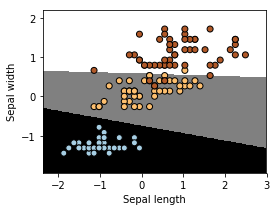

In [73]:
import matplotlib.pyplot as plt

plt.figure(1, figsize=(4, 3))

x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .01
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

predict = predictClassLabel(np.c_[xx1.ravel(), xx2.ravel()],weights,bias)   



Z = predict.reshape(xx1.shape)
plt.figure(1, figsize=(4, 3))

plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.gray)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())


plt.show()

- - - 
#### Упражнение 1 
<font size=4 face = 'Calibri' >Построить функии расчета метрик для каждого из классов софт-макс регрессии


#### упражнение 2 

<font size=4 face = 'Calibri' >Добавить к модели  ***L2*** (Tihonov) регуляризацию

*  ***The L2 может быть добавлена как:***
     $\lambda /2 ||{w}||_{2}^{2}$

<font size=4 face = 'Calibri' >
* где 

 <font size=4 face = 'Calibri' >
  $||{w}||_{2}^{2} = \sum^{m}_{l=0} \sum^{k}_{j=0} w_{i, j}$
        
 <font size=4 face = 'Calibri' >       
* При этом функция потерь будет иметь вид
        
   $H(w; b) = -\frac{1}{N} \sum_{i=1}^N {\sum_{k=1}^K T_i\cdot log(y_{est_i})} + \frac{\lambda}{2} ||{w}||_{2}^{2}$
   
   
   
<font size=4 face = 'Calibri' >
* Также функция обновления весов будет иметь вид:


 $ w^t = w^{t-1} - \eta [\nabla_w H(w,b)+ \lambda w_j ] $


<font size=4 face = 'Calibri' >
* смещение не регуляризируется


#### Упражнение 3 

<font size=4 face = 'Calibri' color = 'Red' >  [ПОЧТИ ОБЯЗАТЕЛЬНО!]

<font size=4 face = 'Calibri'  color = 'Black' >  
    
<font size=4 face = 'Calibri' >
Добавьте  ***L1*** (LASSO) реглуляризацию и сравните результаты с L2

*  ***The L1 можно добавить как:***
     $\lambda \sum^n_{i=1}{w}$

        
* при этом функция потерь
        
   $H(w; b) = -\frac{1}{N} \sum_{i=1}^N {\sum_{k=1}^K T_i\cdot log(y_{est_i})} + \lambda \sum^n_{i=1}{w}$
   


* обновление весов

 $ w^t = w^{t-1} - \eta [\nabla_w H(w,b)+ \lambda ] $


* смещение не обновляется
